#### [지도학습 - 회귀]
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예: 거리, 시간, 무게, 집가격 등등 ...

- 주제 : 공부시간에 따른 점수 예측
- 방법 : Linear Model 계열의 LinearRegression

[1] 모듈 로딩 및 데이터 준비 <hr>

In [861]:
# ========================================================
# [1-1] 모듈 로딩
# ========================================================
# 기본 모듈
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 머신러닝 데이터셋 및 학습관련 모듈
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# CoW 활성화 : 복사와 공유 자동 설정 기능
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [862]:
# ========================================================
# [1-2] 데이터 준비 및 확인
# ========================================================

# 데이터 준비
hour  = [1,  2,  3,  5,  7,  8,  10]
score = [15, 32, 45, 55, 60, 73, 91]

# 공부시간과 성적 데이터 셋
dataDF = pd.DataFrame({'Hour':hour, 'Score':score})
dataDF

,Hour,Score
0,1,15
1,2,32
2,3,45
3,5,55
4,7,60
5,8,73
6,10,91


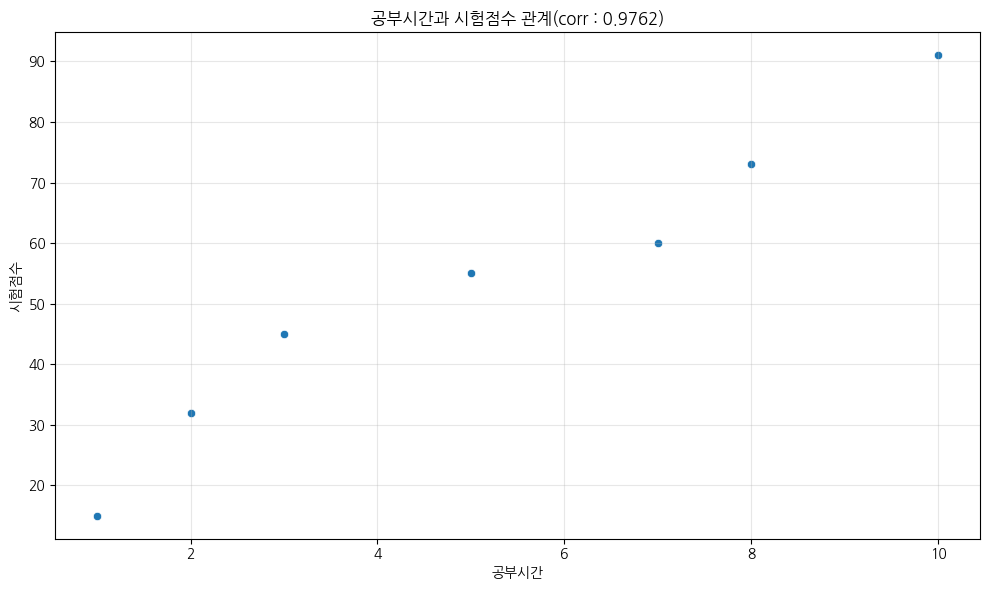

In [863]:
# ========================================================
# 공부시간과 성적 관계 시각화 => Linear Model로써
#                            피쳐와 타겟 선형 관계성
# ========================================================
# => 상관계수 계산 : [기본값] person -> 피쳐와 타겟의 직선의 선형성
corr_ = dataDF.corr(numeric_only=True)['Score']
corr_value = corr_['Hour']

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataDF, x='Hour', y='Score')
plt.title(f"공부시간과 시험점수 관계(corr : {corr_value:.4f})")
plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

[2] 피쳐와 타겟/학습용과 테스트용 분리 <hr>

In [864]:
# ========================================================
# [2-1] 피쳐(2D)와 타겟(1D) 분리
# ========================================================
featureDF = dataDF[dataDF.columns[:1]]
targetSR = dataDF[dataDF.columns[-1]]
print(featureDF)
print(f"featureDF : {featureDF.shape}, targetSR : {targetSR.shape}")

   Hour
0     1
1     2
2     3
3     5
4     7
5     8
6    10
featureDF : (7, 1), targetSR : (7,)


In [865]:
# ========================================================
# [2-2] 학습용과 테스트용 분리 : 회귀 시에는 stratify 필요 없음
#                             분류 시에는 클래스/라벨별 비율 설정을 위해서 stratify 필요!
# ========================================================
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=7)

print(f"[train] x_train : {x_train.shape}, y_train : {y_train.shape}")
print(f"[train] x_test : {x_train.shape}, y_test : {y_train.shape}")


[train] x_train : (5, 1), y_train : (5,)
[train] x_test : (5, 1), y_test : (5,)


In [866]:
# ========================================================
# 학습 진행
# ========================================================
# 모델 인스턴스 생성
lrModel = LinearRegression()
lrModel

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [867]:
# 학습 진행 => 학습용 데이터셋만 사용 => 시험점수 = 공부시간*W1 + W0
lrModel.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [868]:
# 학습 후 학습용 데이터셋 기반 모델 파라미터 설정
# - 모델 파라미터 : 파라미터이름_ => 피쳐에 곱해지는 가중치 W, 결과 미세조정 bias
print('가중치 coef_                  : ', lrModel.coef_)
print('절편 intercept_               : ', lrModel.intercept_)
print('feature_names_in_            : ', lrModel.feature_names_in_)
print('n_features_in_               : ', lrModel.n_features_in_)

print(f'선형식 즉, 모델               : 시험점수 = {lrModel.coef_[0]:.4f} * 공부시간 + {lrModel.intercept_:.4f}')

가중치 coef_                  :  [7.759259]
절편 intercept_               :  11.803703703703704
feature_names_in_            :  ['Hour']
n_features_in_               :  1
선형식 즉, 모델               : 시험점수 = 7.7593 * 공부시간 + 11.8037


[4] 성능평가 <hr>

In [869]:
# 훈련용 성능평가 & 테스트용 성능평가 비교
train_score = lrModel.score(x_train, y_train)
test_score = lrModel.score(x_test, y_test)

print(f"[trian_score] {train_score}")
print(f"[test_score]  {test_score}")

[trian_score] 0.969560309444599
[test_score]  0.7470726953332774


[5] 예측 : 새로운 데이터 사용 <hr>
- predict(2D_새로운 피쳐) => 예측 무게 값
- n_neighbors의 무게를 추출 => 평균한 값과 예측 무게값이 같은지 체크

In [870]:
# =============================================================================
# 새로운 데이터
# =============================================================================

newDF = pd.DataFrame([[4.5]], columns=dataDF.columns[0:1])
display(newDF)

,Hour
0,4.50000


In [871]:
# =============================================================================
# 선형식 값들
# =============================================================================

lrScore = lrModel.predict(pd.DataFrame([[0.5], [10]], columns=dataDF.columns[0:1]))


'[pre_score] : [46.72037] 45.16851851851852'

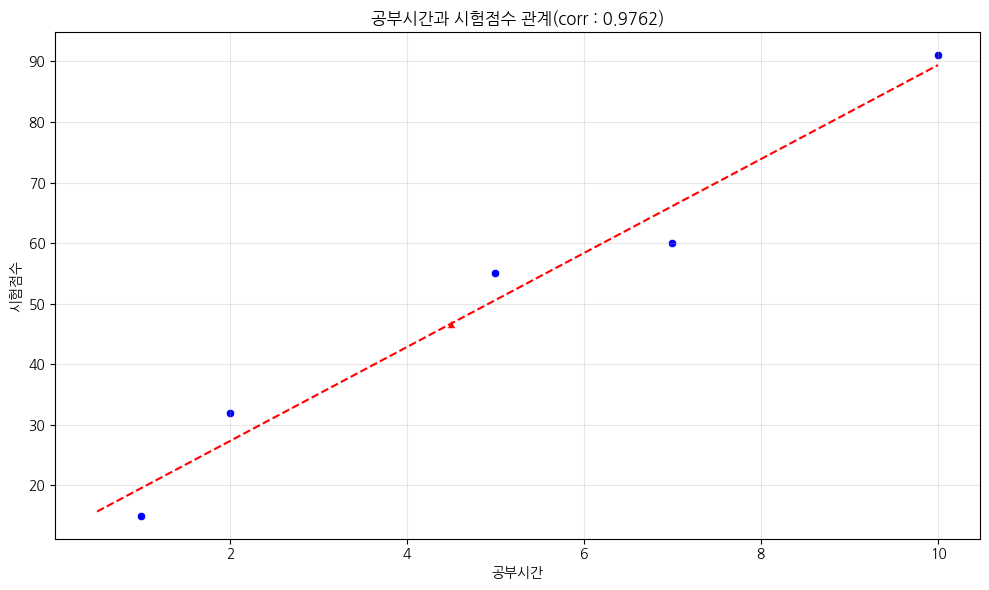

In [872]:
# =============================================================================
# 예측값 추출
# =============================================================================

pre_score = lrModel.predict(newDF)
display(f"[pre_score] : {pre_score} {lrModel.coef_[0]*4.3 + lrModel.intercept_}")

# newDF['pre_score'] = pre_score
# display(newDF)

# =============================================================================
# 시각화
# =============================================================================

plt.figure(figsize=(10, 6))
# 학습 데이터
sns.scatterplot(x=x_train.Hour, y=y_train, color='b')

# 선형식 그래프
plt.plot([0.5, 10], lrScore, color='r', linestyle='--')

# 새로운 데이터
sns.scatterplot(x=newDF.Hour, y=pre_score, marker='^', color='r')

plt.title(f"공부시간과 시험점수 관계(corr : {corr_value:.4f})")
plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()